In [250]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [112]:
#loading and prepping data
#initially only one action
dframe = pd.read_csv('./csv_data/action_1.csv')

In [128]:
dframe.loc[dframe['video_id'].isin([0,1,2])]

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,label,id,video_id
0,-0.382997,-0.419442,3.449989,-0.366909,-0.092619,3.443680,-0.353380,0.229542,3.427116,-0.391862,...,3.636719,-0.435790,-0.536338,3.280097,-0.364369,-0.491436,3.269750,1,72057594037944340,0
1,-0.383146,-0.419292,3.450006,-0.367569,-0.092003,3.443895,-0.353885,0.230300,3.427162,-0.391820,...,3.633053,-0.436031,-0.536649,3.281972,-0.358806,-0.471054,3.269975,1,72057594037944340,0
2,-0.385776,-0.421191,3.449611,-0.369506,-0.092775,3.443796,-0.354571,0.230189,3.426965,-0.403822,...,3.632370,-0.436489,-0.536484,3.286322,-0.358079,-0.470344,3.270202,1,72057594037944340,0
3,-0.385807,-0.421205,3.449582,-0.369576,-0.092714,3.443878,-0.354524,0.230369,3.427140,-0.403580,...,3.499778,-0.441701,-0.533234,3.278971,-0.360298,-0.476572,3.268953,1,72057594037944340,0
4,-0.357840,-0.420304,3.438846,-0.364956,-0.092426,3.442334,-0.354907,0.230391,3.427352,-0.405945,...,3.400878,-0.430001,-0.536492,3.278641,-0.358697,-0.471415,3.270685,1,72057594037944340,0
5,-0.317779,-0.424233,3.417407,-0.347579,-0.091598,3.435570,-0.354990,0.231382,3.428351,-0.413833,...,3.376484,-0.440098,-0.535446,3.284364,-0.360256,-0.475610,3.269022,1,72057594037944340,0
6,-0.340148,-0.420218,3.429176,-0.349129,-0.091376,3.437132,-0.355946,0.231430,3.430860,-0.419386,...,3.402198,-0.431560,-0.535082,3.279142,-0.358869,-0.482122,3.268943,1,72057594037944340,0
7,-0.326968,-0.420078,3.419758,-0.347450,-0.091232,3.436175,-0.357365,0.231702,3.432635,-0.423889,...,3.375357,-0.435553,-0.536029,3.278222,-0.357651,-0.469825,3.270531,1,72057594037944340,0
8,-0.327881,-0.426224,3.441594,-0.346586,-0.092981,3.442161,-0.357856,0.231570,3.434157,-0.423823,...,3.362528,-0.438622,-0.534724,3.280972,-0.359408,-0.476015,3.269827,1,72057594037944340,0
9,-0.375689,-0.436647,3.439764,-0.356871,-0.095212,3.445247,-0.358203,0.232436,3.436680,-0.425678,...,3.341025,-0.432623,-0.537754,3.283831,-0.357795,-0.465352,3.270250,1,72057594037944340,0


In [143]:
#making test and train split
def train_test_split(dframe):
    label = dframe.iloc[0,75]
    num_samples = len(dframe.iloc[:,:])
    video_ids = np.unique(dframe.iloc[:,-1].values)
    train_video_ids = video_ids[:-15]
    test_video_ids = video_ids[-15:]
    train_split = np.empty(len(train_video_ids), dtype=object)
    test_split = np.empty(len(test_video_ids), dtype=object)
    
    for idx,i in enumerate(train_video_ids):
        train_split[idx] = dframe.loc[dframe['video_id'] == i].values[:,0:75]
        mean_vec = np.mean(train_split[idx], axis=0)
        std_vec = np.std(train_split[idx], axis=0)
        train_split[idx] = (train_split[idx] - mean_vec)/std_vec
    
    for idx,i in enumerate(test_video_ids):
        test_split[idx] = dframe.loc[dframe['video_id'] == i].values[:,0:75]
        mean_vec = np.mean(test_split[idx], axis=0)
        std_vec = np.std(test_split[idx], axis=0)
        test_split[idx] = (test_split[idx] - mean_vec)/std_vec
    
    return (train_split, label), (test_split, label)
    #print(train_split[0])
(trainX, trainL), (testX, testL) = train_test_split(dframe)

In [161]:
a = trainX[0]
print(a.shape)
len(np.concatenate((a,np.zeros((1,75))), axis=0))

(46, 75)


47

In [171]:
def Data_gen( train_split, SEQ_LEN):
    while(True):
        X = train_split[0]
        label = train_split[1]
        databatch = random.sample(list(X), 1)[0]
        #print(databatch.shape)
        if len(databatch) > SEQ_LEN:
            databatch = databatch[0:SEQ_LEN]
        elif len(databatch) < SEQ_LEN:
            databatch = np.concatenate((databatch, np.zeros((SEQ_LEN - len(databatch), 75))))
        else:
            pass
        yield databatch,label

ACTd = Data_gen((trainX, trainL), 120)

In [192]:
next(ACTd)

(array([[-0.60951185,  1.57553901,  1.24876459, ..., -1.86534557,
          0.2457119 , -1.00730509],
        [-0.46054762,  1.58948688,  1.40033507, ..., -1.91399503,
          0.00733242, -0.87989857],
        [-0.4051788 ,  1.55067653,  1.49000687, ..., -2.08972584,
         -0.25151534, -0.5870591 ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]), 1)

In [62]:
#some random semantics test data
num_data = 100
dataX = [autograd.Variable(torch.randn((1, 75))) for _ in range(num_data)]
dataY = [autograd.Variable(torch.LongTensor([random.randint(0,9)])) for _ in range(num_data)]
# print(dataY)
# print(dataX)

In [287]:
inp_dim=75
hidden_dim=75
lstm = nn.LSTM(inp_dim, hidden_dim) # Input dim is 3, output dim is 3
inputs = [autograd.Variable(torch.randn((1, inp_dim)))
          for _ in range(10)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (autograd.Variable(torch.randn(1, 1, hidden_dim)),
          autograd.Variable(torch.randn((1, 1, hidden_dim))))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (autograd.Variable(torch.randn(1, 1, hidden_dim)),
          autograd.Variable(torch.randn((1, 1, hidden_dim))))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
#print(hidden)

Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
  -0.0058  0.2427  0.2753  0.0516  0.4153 -0.0706  0.0706  0.2502  0.0863

Columns 9 to 17 
  -0.2481 -0.1431 -0.0782  0.2102  0.0877 -0.2257 -0.0406  0.3572  0.2483

Columns 18 to 26 
  -0.2457  0.3070  0.2396 -0.1228  0.2465  0.1868  0.1645  0.0070 -0.0255

Columns 27 to 35 
  -0.3776  0.1722 -0.2559 -0.4233  0.2004  0.2101 -0.3761  0.0113  0.3763

Columns 36 to 44 
   0.0970 -0.1351  0.2911  0.1273  0.2776  0.0408 -0.3101 -0.5640  0.1336

Columns 45 to 53 
   0.2089 -0.0418 -0.3738 -0.0927 -0.2306 -0.3655 -0.0389 -0.6297 -0.1238

Columns 54 to 62 
  -0.0175 -0.0161  0.1634 -0.2329 -0.0846 -0.0304  0.1750  0.4199 -0.2866

Columns 63 to 71 
   0.1487 -0.2089  0.1540  0.1380  0.1146  0.2261  0.1079 -0.0797  0.1021

Columns 72 to 74 
  -0.0928  0.1232  0.2888

(1 ,.,.) = 

Columns 0 to 8 
   0.0755  0.0003  0.1503  0.1314 -0.0910  0.0125 -0.1590  0.1382  0.1136

Columns 9 to 17 
  -0.0482 -0.1721 -0.1163  0.1833  0.0742 -0.1935  0.0806  

In [253]:
#action LSTM
class LSTMClassifier(nn.Module):
    def __init__(self, joints_dim, hidden_dim, label_size, batch_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.lstm = nn.LSTM(joints_dim, hidden_dim)
        self.hidden2label = nn.Linear(hidden_dim, label_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # the first is the hidden h
        # the second is the cell  c
        return (autograd.Variable(torch.zeros(1, self.batch_size, self.hidden_dim)),
                autograd.Variable(torch.zeros(1, self.batch_size, self.hidden_dim)))

    def forward(self, joints3d_vec):
        #x = torch.cat(joints3d_vec).view(len(joints3d_vec), self.batch_size, -1)
        x = joints3d_vec
        #print(x.shape)
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        #print(lstm_out.shape)
        y  = self.hidden2label(lstm_out[-1])
        #print(y.shape)
        log_probs = F.log_softmax(y, dim=1)
        #print(log_probs.shape)
        return log_probs

In [275]:
model0 = LSTMClassifier(75, 75, 10, 1)

In [276]:
l = autograd.Variable(torch.LongTensor([8]))
x1 = model0.forward(torch.cat(dataX).view(len(dataX), 1, -1))
print(x1, x1.shape)
print(l, l.shape)
F.cross_entropy(x1,l)

Variable containing:
-2.3558 -2.3407 -2.3896 -2.3227 -2.2188 -2.2983 -2.1885 -2.2207 -2.2857 -2.4333
[torch.FloatTensor of size 1x10]
 torch.Size([1, 10])
Variable containing:
 8
[torch.LongTensor of size 1]
 torch.Size([1])


Variable containing:
 2.2857
[torch.FloatTensor of size 1]

In [277]:
model0.forward(torch.cat(dataX).view(len(dataX), 1, -1))
# model0.hidden

Variable containing:
-2.3558 -2.3407 -2.3896 -2.3227 -2.2188 -2.2983 -2.1885 -2.2207 -2.2857 -2.4333
[torch.FloatTensor of size 1x10]

epoch 0 starting ...
epoch: 0 iterations: 0 loss :0.0542997
epoch: 0 iterations: 5 loss :0.0870974
epoch: 0 train==>>>> avg_loss: 0.000558801 accuracy: 100

epoch 1 starting ...
epoch: 1 iterations: 0 loss :0.0411426
epoch: 1 iterations: 5 loss :0.0374514
epoch: 1 train==>>>> avg_loss: 0.000328918 accuracy: 100

epoch 2 starting ...
epoch: 2 iterations: 0 loss :0.0342175
epoch: 2 iterations: 5 loss :0.0314982
epoch: 2 train==>>>> avg_loss: 0.000289768 accuracy: 100

epoch 3 starting ...
epoch: 3 iterations: 0 loss :0.0291386
epoch: 3 iterations: 5 loss :0.0267543
epoch: 3 train==>>>> avg_loss: 0.00036287 accuracy: 100

epoch 4 starting ...
epoch: 4 iterations: 0 loss :0.0247038
epoch: 4 iterations: 5 loss :0.0230277
epoch: 4 train==>>>> avg_loss: 0.000205166 accuracy: 100

epoch 5 starting ...
epoch: 5 iterations: 0 loss :0.0215992
epoch: 5 iterations: 5 loss :0.0203218
epoch: 5 train==>>>> avg_loss: 0.000174013 accuracy: 100

epoch 6 starting ...
epoch: 6 iterations: 0 loss :0.0191822

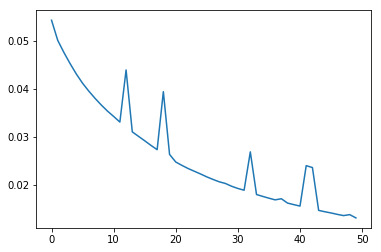

In [308]:
#training function
def train(model, num_epoch, num_iter, rec_interval):
    optimizer = optim.Adam(model.parameters(), lr = 1e-4)
    loss_values = []
    rec_step = 0
    for eph in range(num_epoch):
        print('epoch {} starting ...'.format(eph))
        avg_loss = 0
        n_samples = 0
        for i in range(num_iter):
            X,Y = next(ACTd)
            n_samples += len(X)
            X = autograd.Variable(torch.from_numpy(X).float())
            #print(X)
            Y = autograd.Variable(torch.LongTensor(np.array([Y])))
            y_hat = model(X)
            model.zero_grad()
            loss = F.cross_entropy(y_hat, Y)
            avg_loss += loss.data[0]
            if i % 5 == 0:
                print('epoch: %d iterations: %d loss :%g' % (eph, i, loss.data[0]))
            if rec_step%rec_interval==0:
                loss_values.append(loss.data[0])
            model.hidden = (model.hidden[0].detach(), model.hidden[1].detach())
            loss.backward()
            optimizer.step()
            rec_step += 1
        avg_loss /= n_samples
        #evaluating model accuracy
        acc = evaluate_accuracy(model, (testX, testL))
        print('epoch: %d train==>>>> avg_loss: %g accuracy: %g\n'%(eph, avg_loss, acc))
    return loss_values
l = train(model0, 10, 10, 2)
plt.plot(l)

In [283]:
model0.forward(autograd.Variable(torch.rand(10,75)))

Variable containing:
-5.4524 -0.0625 -5.3181 -4.7240 -5.1297 -5.0138 -5.1998 -4.5876 -4.4698 -5.8699
[torch.FloatTensor of size 1x10]

In [307]:
def evaluate_accuracy(model, test_split):
    X, label = test_split[0], test_split[1]
    Y = autograd.Variable(torch.LongTensor(np.array([label])))
    pred_labels = np.empty(len(X))
    for i in range(len(X)):
        d_in = autograd.Variable(torch.from_numpy(X[i]).float())
        y_pred = model(d_in)
        pred_labels[i] = y_pred.data.max(1)[1].numpy()[0];
    n_samples = len(pred_labels)
    labels = [label]*n_samples
    res=(labels==pred_labels)
    correct_count = (res==True).sum()
    #print(correct_count*100/n_samples)
    return (correct_count*100/n_samples)
acc = evaluate_accuracy(model0, (testX, testL))
print(acc)

100.0
